In [981]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests #--pip install requests
#!pip install pycountry
#!pip install pyzipcode
import pycountry
import re
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split # División del dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from geopy.geocoders import Photon
from geopy.exc import GeocoderTimedOut
from pyzipcode import ZipCodeDatabase
import statsmodels.api as sm
#from uszipcode import SearchEngine, SimpleZipcode, Zipcode

Retail Analysis on Large Dataset
https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset

In [982]:
df_Retail = pd.read_csv('../data/new_retail_data.csv')

In [983]:
df_Retail.size

9060300

In [984]:
df_Retail.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [985]:
df_Retail_copy=df_Retail.copy()

In [986]:
df_Retail_copy.size

9060300

##Estudio univariable. Completitud, correctitud y consistencia

- Transaction_ID es el numero unico de transaccion, no deberian de haber repetidos

In [987]:
# Encontrar valores que se repiten en 'Transaction_ID'
duplicate_values_copy = df_Retail_copy[df_Retail_copy.duplicated(subset=['Transaction_ID'], keep=False)]

# Guardar duplicate_values como DataFrame
duplicate_values_copy = pd.DataFrame(duplicate_values_copy)
duplicate_values_copy.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
32,8973612.0,65701.0,Christopher Lopez,Derrick51@gmail.com,9.286274e+09,57136 Martha Common Apt. 654,Portsmouth,England,11531.0,UK,66.0,Male,Medium,Regular,5/22/2023,2023.0,May,11:24:20,7.0,344.679185,2412.754296,Home Decor,IKEA,Decorations,Excellent,Same-Day,Debit Card,Processing,5.0,Curtains
42,3902930.0,77572.0,Jose Spencer,Amber67@gmail.com,8.282195e+09,02936 Roy Village,Portsmouth,England,98771.0,UK,68.0,Female,High,Regular,10/6/2023,2023.0,October,4:59:02,6.0,334.165698,2004.994190,Electronics,Apple,Laptop,Bad,Same-Day,Debit Card,Shipped,1.0,Microsoft Surface Laptop
72,9534452.0,20500.0,Matthew Hicks,Kara43@gmail.com,1.568422e+09,51720 Rachael Spurs Suite 283,Portsmouth,England,94447.0,UK,61.0,Female,Medium,Regular,6/6/2023,2023.0,June,8:43:39,4.0,201.953735,807.814939,Clothing,Zara,Dress,Average,Standard,PayPal,Processing,2.0,Maxi dress
93,1874788.0,74649.0,Courtney Perry,Tina32@gmail.com,7.402422e+09,571 Samuel Wall Apt. 895,Portsmouth,England,24895.0,UK,18.0,Male,High,Regular,4/19/2023,2023.0,April,22:26:07,5.0,289.116783,1445.583914,Grocery,Nestle,Chocolate,Average,Express,Debit Card,Delivered,2.0,Chocolate-covered fruits


In [988]:
df_filtered_transaction = df_Retail_copy[df_Retail_copy['Transaction_ID'] == 8691788]
df_filtered_transaction.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
112551,8691788.0,57392.0,Jacqueline Collins,Krystal93@gmail.com,5.575568e+09,32467 Lopez Falls Suite 272,Ottawa,Ontario,88811.0,Canada,46.0,Male,Medium,New,12/29/2023,2023.0,December,20:43:59,2.0,147.379781,294.759562,Electronics,Sony,Television,Excellent,Standard,Cash,Processing,4.0,LED TV


Este resultado es inconsistente, muestra para una misma trasaccion distintos customer_id. Procedo a eliminar duplicados de Transaction_ID

In [989]:
columns_to_check = [
    'Customer_ID', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender',
    'Income', 'Customer_Segment', 'Date', 'Month', 'Time',
    'Total_Amount', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Feedback'
]

# Encontrar Transaction_IDs consistentes para cada columna
consistent_transaction_ids = set(df_Retail_copy['Transaction_ID'])  # Inicialmente todos los IDs son válidos
for column in columns_to_check:
    # Agrupar por Transaction_ID y verificar cuántos valores únicos hay
    consistency = df_Retail_copy.groupby('Transaction_ID')[column].nunique()
    
    # Identificar Transaction_ID donde el valor es consistente (solo un valor único de la columna)
    consistent_ids = consistency[consistency == 1].index
    
    # Intersección con IDs válidos actuales
    consistent_transaction_ids &= set(consistent_ids)

# Filtrar el DataFrame original para mantener solo los Transaction_IDs con valores consistentes en todas las columnas
df_Retail_copy = df_Retail_copy[df_Retail_copy['Transaction_ID'].isin(consistent_transaction_ids)]

- Customer_ID es el identificador del cliente. Se observa que para un mismo identificador de cliente, el nombre, la direccion, y los datos de la persona son distintos en las transacciones realizadas por el cliente. Esto puede ser una inconsistencia de datos o compras realizadas por familiares, amigos de la persona o robo de cuenta. Como no es posible definir cual es la situacion, continuare estudiando las otras variables y retomare luego esta inconsistencia.

In [990]:
df_Retail_copy_unique=df_Retail_copy.copy()
df_Retail_copy_unique['Customer_ID'].value_counts().max()

np.int64(13)

Se observa que el comprador que compro mas veces lo hizo 13 veces

In [991]:
df_Retail_unique_copy=df_Retail_copy_unique.copy()

In [992]:
pd.set_option('display.max_columns', None)
df_filtered2 = df_Retail_unique_copy[df_Retail_unique_copy['Customer_ID'] == 10037]
df_filtered2.head(20)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
8531,5056596.0,10037.0,Robert Wilson,James32@gmail.com,1.226992e+09,33461 Sarah Forges Suite 845,Portsmouth,England,20966.0,UK,19.0,Male,Medium,Regular,10/3/2023,2023.0,October,11:16:40,2.0,98.308952,196.617904,Grocery,Pepsi,Soft Drink,Bad,Same-Day,Cash,Delivered,1.0,Lemon-lime soda
188313,6849125.0,10037.0,Cassandra Villanueva,Meagan47@gmail.com,6.429721e+09,02641 Stewart Underpass,Adelaide,New South Wales,38930.0,Australia,44.0,Female,Low,New,4/8/2023,2023.0,April,1:33:29,3.0,302.369356,907.108068,Electronics,Apple,Tablet,Bad,Express,Debit Card,Delivered,1.0,iPad


- Name es el nombre del cliente, a efectos de corroborar el problema mencionado anteriormente, voy a dejar esta variable, pero la terminare eliminando cuando pase a la etapa de evaluacion estadistica ya que no tiene valor.


- City es la ciudad donde el cliente vive
Corroborar que la ciudad no tenga caracteres raros y que para una misma ciudad este escrito de forma diferente

In [993]:
df_Retail_copy_unique['City'].unique()

array(['Nottingham', 'Geelong', 'Edmonton', 'Bristol', 'Brisbane',
       'Kitchener', 'Munich', 'Wollongong', 'Cologne', 'Portsmouth',
       'San Jose', 'Hamilton', 'Manchester', 'Cardiff', 'Glasgow', 'Hull',
       'Cleveland', 'Southampton', 'Leipzig', 'Cairns', 'London',
       'Bielefeld', 'Düsseldorf', 'Philadelphia', 'Halifax', 'Montreal',
       'Dortmund', 'Mackay', 'Quebec City', 'Barrie', 'Adelaide', 'Leeds',
       'Plymouth', 'Perth', 'Sheffield', 'Frankfurt', 'Toronto',
       'Kelowna', 'Birmingham', 'Ottawa', 'Liverpool', "St. John's",
       'Hobart', 'Atlanta', 'New Orleans', 'Wichita', 'Albury-Wodonga',
       'Winnipeg', 'Vancouver', 'Hamburg', 'Windsor', 'Calgary',
       'Newcastle upon Tyne', 'Townsville', 'Oshawa', 'Houston',
       'Seattle', 'Charlotte', 'New York', 'Milwaukee', 'Edinburgh',
       'Launceston', 'Bochum', 'Münster', 'Bonn', 'Columbus', 'Melbourne',
       'Leicester', 'Fort Worth', 'Toowoomba', 'Victoria', 'Oxford',
       'Saskatoon', 'Memph

In [994]:
df_Retail_copy_unique['Country'].unique()

array(['UK', 'Australia', 'Canada', 'Germany', 'USA'], dtype=object)

In [995]:
# Crear un dataframe con combinaciones únicas de ciudad y país
unique_cities = df_Retail_copy_unique[['City', 'Country']].drop_duplicates()
unique_cities = unique_cities.dropna()
print(unique_cities)

               City    Country
1        Nottingham         UK
2           Geelong  Australia
3          Edmonton     Canada
4           Bristol         UK
5          Brisbane  Australia
...             ...        ...
30592  Indianapolis        USA
30626       Detroit        USA
30635   Los Angeles        USA
30684       El Paso        USA
30981   Albuquerque        USA

[131 rows x 2 columns]


In [996]:
df_Retail_copy_unique['Country'] =df_Retail_copy_unique['Country'].replace('USA','United States')
df_Retail_copy_unique['Country'] =df_Retail_copy_unique['Country'].replace('UK','United Kingdom')

In [997]:
df_Retail_validate_country=df_Retail_copy_unique.copy()

In [998]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['Country'])

In [999]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['City'])

In [1000]:
df_Retail_copy_unique.size

8481000

In [1001]:
df_Retail_countries=df_Retail_copy_unique.copy()

In [1002]:
def validate_country(country_name):
    try:
        # Validate by country name
       
        country = pycountry.countries.lookup(country_name)
        
        if(country_name==country.name):
           # print(country.name)
           pass
        else:
            print("No encontrado")
        return country.name
    except LookupError:
        return None

df_Retail_validate_country['pais_valido'] = df_Retail_validate_country.apply(lambda row: validate_country(row['Country']), axis=1)

In [1003]:
# Filtra las filas con resultados incorrectos en la validación
df_paises_incorrectos = df_Retail_validate_country[df_Retail_validate_country['pais_valido'] == False]
if(df_paises_incorrectos.empty):
    print("Todas los paises son correctos")
else:
    print(df_paises_incorrectos)

Todas los paises son correctos


In [1004]:
df_Retail_validate_country['pais_valido'].unique()

array(['United Kingdom', 'Australia', 'Canada', 'Germany',
       'United States'], dtype=object)

- State es el estado donde el cliente vive

In [1005]:
df_Retail_copy_unique['State'].unique()

array(['England', 'New South Wales', 'Ontario', 'Berlin', 'Virginia',
       'Nevada', 'Colorado', 'Arkansas', 'Texas', 'Oklahoma',
       'Connecticut', 'Mississippi', 'Wisconsin', 'Oregon', 'Michigan',
       'Alaska', 'New Jersey', 'Wyoming', 'Maine', 'Idaho', 'Alabama',
       'New Hampshire', 'Minnesota', 'Delaware', 'South Carolina',
       'Nebraska', 'New Mexico', 'Arizona', 'Iowa', 'Illinois', 'Ohio',
       'Georgia', 'New York', 'Pennsylvania', 'Massachusetts',
       'Rhode Island', 'Montana', 'West Virginia', 'Louisiana', 'Indiana',
       'Kansas', 'Kentucky', 'Washington', 'South Dakota', 'California',
       'Missouri', 'Utah', 'Hawaii', 'North Carolina', 'Maryland',
       'Vermont', 'North Dakota', 'Tennessee', 'Florida'], dtype=object)

In [1006]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['State'])

In [1007]:
df_Retail_copy_unique['State'].unique()

array(['England', 'New South Wales', 'Ontario', 'Berlin', 'Virginia',
       'Nevada', 'Colorado', 'Arkansas', 'Texas', 'Oklahoma',
       'Connecticut', 'Mississippi', 'Wisconsin', 'Oregon', 'Michigan',
       'Alaska', 'New Jersey', 'Wyoming', 'Maine', 'Idaho', 'Alabama',
       'New Hampshire', 'Minnesota', 'Delaware', 'South Carolina',
       'Nebraska', 'New Mexico', 'Arizona', 'Iowa', 'Illinois', 'Ohio',
       'Georgia', 'New York', 'Pennsylvania', 'Massachusetts',
       'Rhode Island', 'Montana', 'West Virginia', 'Louisiana', 'Indiana',
       'Kansas', 'Kentucky', 'Washington', 'South Dakota', 'California',
       'Missouri', 'Utah', 'Hawaii', 'North Carolina', 'Maryland',
       'Vermont', 'North Dakota', 'Tennessee', 'Florida'], dtype=object)

Elimino la columna State porque solo esta completa para USA

In [1008]:
df_Retail_copy_unique['City'].unique()

array(['Nottingham', 'Geelong', 'Edmonton', 'Bristol', 'Brisbane',
       'Kitchener', 'Munich', 'Wollongong', 'Cologne', 'Portsmouth',
       'San Jose', 'Hamilton', 'Manchester', 'Cardiff', 'Glasgow', 'Hull',
       'Cleveland', 'Southampton', 'Leipzig', 'Cairns', 'London',
       'Bielefeld', 'Düsseldorf', 'Philadelphia', 'Halifax', 'Montreal',
       'Dortmund', 'Mackay', 'Quebec City', 'Barrie', 'Adelaide', 'Leeds',
       'Plymouth', 'Perth', 'Sheffield', 'Frankfurt', 'Toronto',
       'Kelowna', 'Birmingham', 'Ottawa', 'Liverpool', "St. John's",
       'Hobart', 'Atlanta', 'New Orleans', 'Wichita', 'Albury-Wodonga',
       'Winnipeg', 'Vancouver', 'Hamburg', 'Windsor', 'Calgary',
       'Newcastle upon Tyne', 'Townsville', 'Oshawa', 'Houston',
       'Seattle', 'Charlotte', 'New York', 'Milwaukee', 'Edinburgh',
       'Launceston', 'Bochum', 'Münster', 'Bonn', 'Columbus', 'Melbourne',
       'Leicester', 'Fort Worth', 'Toowoomba', 'Victoria', 'Oxford',
       'Saskatoon', 'Memph

In [1009]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['City'])

In [1010]:
df_Retail_copy_unique['City'].unique()

array(['Nottingham', 'Geelong', 'Edmonton', 'Bristol', 'Brisbane',
       'Kitchener', 'Munich', 'Wollongong', 'Cologne', 'Portsmouth',
       'San Jose', 'Hamilton', 'Manchester', 'Cardiff', 'Glasgow', 'Hull',
       'Cleveland', 'Southampton', 'Leipzig', 'Cairns', 'London',
       'Bielefeld', 'Düsseldorf', 'Philadelphia', 'Halifax', 'Montreal',
       'Dortmund', 'Mackay', 'Quebec City', 'Barrie', 'Adelaide', 'Leeds',
       'Plymouth', 'Perth', 'Sheffield', 'Frankfurt', 'Toronto',
       'Kelowna', 'Birmingham', 'Ottawa', 'Liverpool', "St. John's",
       'Hobart', 'Atlanta', 'New Orleans', 'Wichita', 'Albury-Wodonga',
       'Winnipeg', 'Vancouver', 'Hamburg', 'Windsor', 'Calgary',
       'Newcastle upon Tyne', 'Townsville', 'Oshawa', 'Houston',
       'Seattle', 'Charlotte', 'New York', 'Milwaukee', 'Edinburgh',
       'Launceston', 'Bochum', 'Münster', 'Bonn', 'Columbus', 'Melbourne',
       'Leicester', 'Fort Worth', 'Toowoomba', 'Victoria', 'Oxford',
       'Saskatoon', 'Memph

In [1011]:
df_Retail_validate_city_country=df_Retail_copy_unique.copy()

In [1012]:
#df_Retail_countries = df_Retail_countries.drop(columns=['State'])

In [1013]:
geolocator = Photon(user_agent="geoapiExercises")

def validate_city_country(city, country, ):
    try:
        # Ensure proper formatting of the query
        query = f"{city}, {country}"
        location = geolocator.geocode(query, timeout=10)
        if location and location.address:
            return location.address
        else:
            return None
    except GeocoderTimedOut:
        time.sleep(1)  # Wait a bit before retrying
        return validate_city_country(city, country)

In [1014]:
print(validate_city_country('Montevideo','Uruguay'))

Montevideo, Montevideo, Uruguay


In [1015]:
# Extract unique city-country pairs
#unique_city_country_pairs = df_Retail_validate_city_country[['City', 'Country']].drop_duplicates()
#unique_city_country_pairs = unique_city_country_pairs.drop_duplicates()
# Apply the validation function to the unique city-country pairs
#unique_city_country_pairs['Validation'] = unique_city_country_pairs.apply(
#    lambda row: validate_city_country(row['City'], row['Country']), axis=1
#)

In [1016]:
#print(f"Original dataframe shape: {df_Retail_validate_city_country.shape}")
#print(f"Unique city-country pairs shape: {unique_city_country_pairs.shape}")

#df_Retail_validate_city_country = df_Retail_validate_city_country.merge(unique_city_country_pairs, on=['City', 'Country'], how='left', suffixes=('', '_Validation'))

#print(f"Dataframe shape after merge: {df_Retail_validate_city_country.shape}")

In [1017]:
# Filtra las filas con resultados incorrectos en la validación
#df_incorrectas = df_Retail_validate_city_country[df_Retail_validate_city_country['Validation'].isna()]
#if(df_incorrectas.empty):
#    print("Todas las ciudades son correctas")
#else:
#    print(df_incorrectas)

In [1018]:
#for country in pycountry.countries:
#    print(country.name)

- Zip code es el codigo de la direccion del cliente

In [1019]:
nan_count = df_Retail_copy_unique['Zipcode'].isna().sum()
print(nan_count)

0


In [1020]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['Zipcode'])

In [1021]:
nan_count_afterDrop = df_Retail_copy_unique['Zipcode'].isna().sum()
print(nan_count_afterDrop)

0


In [1022]:
df_Retail_countries_city_address=df_Retail_copy_unique.copy()

In [1023]:
#Agrupo y cuento valores unicos, es decir todos aquellos que tienen para un mismo pais, ciudad y direccion un zipcode distinto
grouped = df_Retail_countries_city_address.groupby(['Country', 'City', 'Address'])['Zipcode'].nunique()

#Filtrar los grupos con más de un código postal
multiple_zipcodes = grouped[grouped > 1].index

#Extraer las filas que corresponden a estos grupos para poder actualizar la informacion
df_multiple_zipcodes = df_Retail_countries_city_address.set_index(['Country', 'City', 'Address']).loc[multiple_zipcodes]

print("Combinaciones con códigos postales distintos:")
df_multiple_zipcodes.head()

Combinaciones con códigos postales distintos:


,,,Transaction_ID,Customer_ID,Name,Email,Phone,State,Zipcode,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Country,City,Address,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [1024]:
df_Retail_countries_zipcode=df_Retail_copy_unique.copy()

In [1025]:
df_Retail_countries_zipcode = df_Retail_countries_zipcode.dropna(subset=['Zipcode'])
df_Retail_countries_zipcode['Zipcode'] = df_Retail_countries_zipcode['Zipcode'].round(0)
df_Retail_countries_zipcode['Zipcode'] = df_Retail_countries_zipcode['Zipcode'].astype(int)


Se chequea que no hayan distintos Zipcodes para una misma direccion en una misma ciudad, estado y pais.
Se podria verificar con una api que el Zipcode exista.

##Limpieza de datos

In [1026]:
df_Retail_copy_unique.isna().sum().sum() # number of missing cells
round(df_Retail_copy_unique.isna().sum().sum() / df_Retail_copy_unique.size * 100, 1) # percentage of missing cells

np.float64(0.0)

EL 10% tiene datos faltantes

In [1027]:
df_Retail_copy_unique.isna().sum()

Transaction_ID        0
Customer_ID           0
Name                361
Email               325
Phone               342
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                  0
Year                340
Month                 0
Time                  0
Total_Purchases     335
Amount              334
Total_Amount          0
Product_Category    267
Product_Brand       260
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64

Por mayor comodidad, transformo todas las variables a category menos las numericas

In [1028]:
columns_not_to_convert = ['Age', 'Zipcode','Total_Purchases', 'Amount', 'Total_Amount', 'Ratings', 'Customer_ID', 'Transaction_ID']
all_columns = set(df_Retail_copy_unique.columns)

columns_not_to_convert_set = set(columns_not_to_convert)
columns_to_skip = list(all_columns - columns_not_to_convert_set)

# Convertir las columnas restantes a tipo 'category'
for col in columns_to_skip:
    df_Retail_copy_unique[col] = df_Retail_copy_unique[col].astype('category')

In [1029]:
df_Retail_copy_unique['Age'].unique()

array([19., 48., 56., 22., 58., 29., 46., 25., 64., 31., 53., 32., 43.,
       69., 49., 61., 21., 41., 38., 59., 20., 67., 50., 26., 24., 54.,
       28., 34., 65., 40., 36., 57., 27., 35., 68., 70., 37., 30., 39.,
       47., 60., 33., 62., 42., 18., 44., 66., 51., 63., 55., 23., 52.,
       45.])

La edad esta en float, la transformo a entero

In [1030]:
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['Age'])
df_Retail_copy_unique = df_Retail_copy_unique.dropna(subset=['Year'])

In [1031]:
df_Retail_copy_unique['Age'] = df_Retail_copy_unique['Age'].astype('int')
df_Retail_copy_unique['Year'] = df_Retail_copy_unique['Year'].astype('int')

Quiero borrar todos los valores nulos o nan pero quiero estudiar primero si me conviene borrar las filas o una columna entera, porque si los datos faltantes es tan en su mayoria en una columna puede ser mejor deshacerme de esa columna en lugar de borrar registros.
A continuacion estudio cual es la variable que tiene la mayor cantidad de nulos o valores nan

In [1032]:
# Calcular el número de valores NaN por columna
nan_counts = df_Retail_copy_unique.isna().sum()

# Encontrar la columna con el mayor número de NaN
column_with_most_nan = nan_counts.idxmax()
max_nan_count = nan_counts.max()

# Mostrar resultados
print("La columna con la mayor cantidad de NaN es:", column_with_most_nan)
print("Número de NaN en esta columna:", max_nan_count)

La columna con la mayor cantidad de NaN es: Name
Número de NaN en esta columna: 361


Siendo que Name es la columna con la mayor cantidad de nulos y que esta no tiene valor estadistico para mi estudio, la elimino

In [1033]:
df_Retail_copy_unique = df_Retail_copy_unique.drop(columns=['Name'])

Email --> Mail del cliente

In [1034]:
df_Retail_copy_unique = df_Retail_copy_unique.drop(columns=['Email'])

Phone --> Phone del cliente

In [1035]:
df_Retail_copy_unique = df_Retail_copy_unique.drop(columns=['Phone'])

In [1036]:
df_Retail_copy_unique['Total_Amount'] = df_Retail_copy_unique['Total_Amount'].round(2)
df_Retail_copy_unique['Amount'] = df_Retail_copy_unique['Amount'].round(2)
df_Retail_copy_unique['Total_Purchases'] = df_Retail_copy_unique['Total_Purchases'].round(2)

In [1037]:
# Quiero eliminar las filas que contengan NAN, pero no quiero quedarme con pocos datos por lo que cuento primero cuantas filas se borrarian

total_rows_before = df_Retail_copy_unique.shape[0]

# Eliminar todas las filas que contienen al menos un NaN en alguna columna
df_Retail_copy_unique = df_Retail_copy_unique.dropna()

# Contar las filas después de eliminar NaN
total_rows_after = df_Retail_copy_unique.shape[0]

# Calcular cuántas filas se eliminaron
rows_deleted = total_rows_before - total_rows_after

# Mostrar resultados
print("Número total de filas antes de eliminar NaN:", total_rows_before)
print("Número total de filas después de eliminar NaN:", total_rows_after)
print("Número de filas eliminadas:", rows_deleted)

Número total de filas antes de eliminar NaN: 282360
Número total de filas después de eliminar NaN: 281164
Número de filas eliminadas: 1196


Age

In [1038]:
df_Retail_verificarAge=df_Retail_copy_unique.copy()

In [1039]:
# Verificar si hay clientes con edad menor a 18
underage_clients = (df_Retail_verificarAge['Age'] < 18).any()

# Mostrar resultado
if underage_clients:
    print("Hay clientes cuya edad es menor a 18.")
else:
    print("No hay clientes cuya edad sea menor a 18.")

No hay clientes cuya edad sea menor a 18.


Gender

In [1040]:
df_Retail_verificarGender=df_Retail_copy_unique.copy()

In [1041]:
df_Retail_verificarGender['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

	Income

In [1042]:
df_Retail_verificarIncome=df_Retail_copy_unique.copy()

In [1043]:
df_Retail_verificarIncome['Income'].unique()

['Low', 'High', 'Medium']
Categories (3, object): ['High', 'Low', 'Medium']

	Customer_Segment

In [1044]:
df_Retail_verificarCustomer_Segment=df_Retail_copy_unique.copy()

In [1045]:
df_Retail_verificarCustomer_Segment['Customer_Segment'].unique()

['Premium', 'Regular', 'New']
Categories (3, object): ['New', 'Premium', 'Regular']

	Date
    Figura como mm/dd/yyyy

In [1046]:
df_Retail_verificarDate=df_Retail_copy_unique.copy()

In [1047]:
num_rows_df_Retail_copy_unique = df_Retail_copy_unique.shape[0]
print(f"Number of rows: {num_rows_df_Retail_copy_unique}")

Number of rows: 281164


In [1048]:
df_Retail_verificarDate['Date'].unique()

['12/31/2023', '4/26/2023', '5/8/2023', '1/10/2024', '9/21/2023', ..., '8/21/2023', '3/31/2023', '1/24/2024', '6/7/2023', '2/1/2024']
Length: 366
Categories (366, object): ['1/1/2024', '1/10/2024', '1/11/2024', '1/12/2024', ..., '9/6/2023', '9/7/2023', '9/8/2023', '9/9/2023']

In [1049]:
#Verfico que solo hay datos para el 2023 y 2024
df_Retail_verificarDate['Date'] = pd.to_datetime(df_Retail_verificarDate['Date'], errors='coerce')
df_Retail_verificarDate['Extracted_Year'] = df_Retail_verificarDate['Date'].dt.year
df_Retail_verificarDate['Year_Match'] = df_Retail_verificarDate['Extracted_Year'] == df_Retail_verificarDate['Year']

num_rows = df_Retail_verificarDate.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 281164


In [1050]:
df_Retail_verificarDate['Date'].isna().sum()

np.int64(0)

Year

In [1051]:
df_Retail_verificarYear=df_Retail_copy_unique.copy()

In [1052]:
df_2023 = df_Retail_verificarYear[df_Retail_verificarYear['Year'] == 2023]
df_2024 = df_Retail_verificarYear[df_Retail_verificarYear['Year'] == 2024]

# Contar el número de columnas para cada año
num_rows_2023 = df_2023.shape[0]
num_rows_2024 = df_2024.shape[0]

print(f"Number of rows for 2023: {num_rows_2023}")
print(f"Number of rows for 2024: {num_rows_2024}")

Number of rows for 2023: 234835
Number of rows for 2024: 46329


Hay pocos datos para el 2024, realizar comparaciones entre year no es logico por lo que elimino la columna

In [1053]:
df_Retail_copy_unique = df_Retail_copy_unique.drop(columns=['Year'])

	Month

In [1054]:
df_Retail_verificarMonth=df_Retail_copy_unique.copy()

In [1055]:
unique_months = df_Retail_verificarMonth['Month'].cat.categories
print(unique_months)

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')


In [1056]:
def verificarMeses(months):
    correct_months = ['April', 'August', 'December', 'February', 'January', 'July', 'June',
                      'March', 'May', 'November', 'October', 'September']

    # Iniciar el resultado con un mensaje predeterminado
    resultado = f"El mes: {months} es correcto" 

    # Verificar cada mes en unique_months
    for mes in unique_months:
        if mes not in correct_months:
            resultado = f"Mes incorrecto encontrado: {mes}"
            break  # Salir del bucle si se encuentra un mes incorrecto

    return resultado

for mesUnico in unique_months:
  print(verificarMeses(mesUnico))

El mes: April es correcto
El mes: August es correcto
El mes: December es correcto
El mes: February es correcto
El mes: January es correcto
El mes: July es correcto
El mes: June es correcto
El mes: March es correcto
El mes: May es correcto
El mes: November es correcto
El mes: October es correcto
El mes: September es correcto


Time ---> Tiempo en el que se hizo la compra. El formato es hh:mm:ss

In [1057]:
df_Retail_verificarTime=df_Retail_copy_unique.copy()

In [1058]:
df_Retail_verificarTime['Time'].head(2)

1    8:42:04
2    4:06:29
Name: Time, dtype: category
Categories (83105, object): ['0:00:00', '0:00:01', '0:00:02', '0:00:03', ..., '9:59:56', '9:59:57', '9:59:58', '9:59:59']

In [1059]:
time_pattern = re.compile(r'^\d{1,2}:\d{2}:\d{2}$')

# Función para verificar el formato de la hora
def verificar_formato_hora(time_str):
    return bool(time_pattern.match(time_str))

# Aplicar la función a la columna 'Time'
df_Retail_verificarTime['Formato Correcto'] = df_Retail_verificarTime['Time'].astype(str).apply(verificar_formato_hora)

# Verificar si todos los valores tienen el formato correcto
todos_correctos = df_Retail_verificarTime['Formato Correcto'].all()

print(f"Todos los valores tienen el formato correcto: {todos_correctos}")

Todos los valores tienen el formato correcto: True


Total_Purchases --> Cantidad de artículos comprados por el cliente

In [1060]:
df_Retail_verificarTotal_Purchases=df_Retail_copy_unique.copy()

In [1061]:
df_Retail_verificarTotal_Purchases['Total_Purchases'].dtype

dtype('float64')

Verificar normalidad de los datos

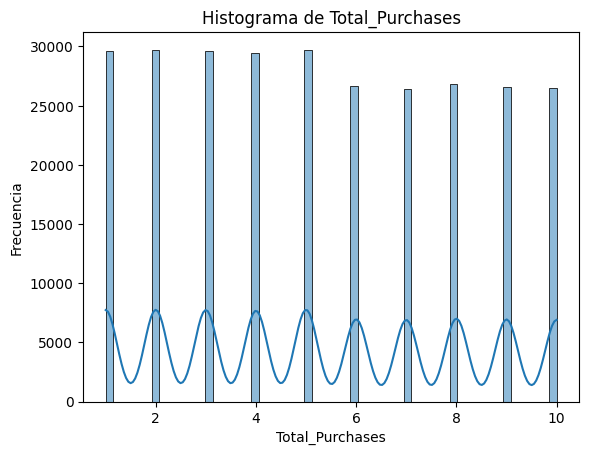

In [1062]:
sns.histplot(df_Retail_verificarTotal_Purchases['Total_Purchases'], kde=True)
plt.title('Histograma de Total_Purchases')
plt.xlabel('Total_Purchases')
plt.ylabel('Frecuencia')
plt.show()

La variable Total_Purchases es normal, el rango va entre 1 a 10 cantidades compradas

Amount --> Total gastado en una compra. La elimino porque la columna Total_Amount es un producto entre 

In [1063]:
df_Retail_copy_unique = df_Retail_copy_unique.drop(columns=['Amount'])

Total_Amount --> Total amount spent by the customer (calculated as Amount * Total_Purchases).

In [1064]:
df_Retail_verificar_TotalAmount=df_Retail_copy_unique.copy()

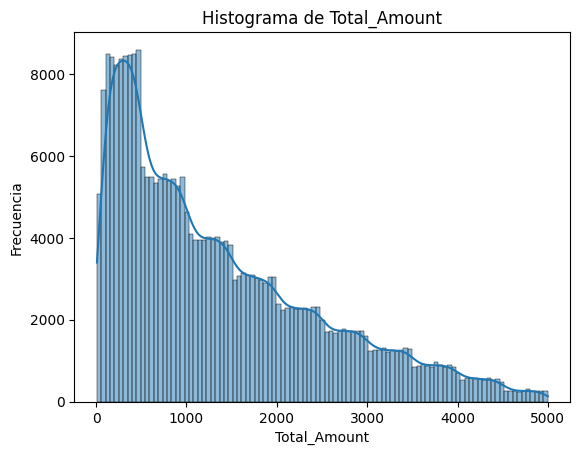

In [1065]:
sns.histplot(df_Retail_verificar_TotalAmount['Total_Amount'], kde=True)
plt.title('Histograma de Total_Amount')
plt.xlabel('Total_Amount')
plt.ylabel('Frecuencia')
plt.show()

El histograma sugiere que los valores en la columna 'Total_Amount' están distribuidos de manera no uniforme, como se puede apreciar en el histograma la variable no presenta una distribución normal. Esto es un problema para realizar comparaciones estadísticas, por lo que es necesario normalizarla.

En el siguiente grafico se puede observar si la variable presenta o no una distribucion normal. La linea roja es una linea teórica donde los datos siguen una distribución normal. Si los puntos de la variable a estudiar se alinean aproximadamente a lo largo de la recta roja entonces se puede decir que es normal.

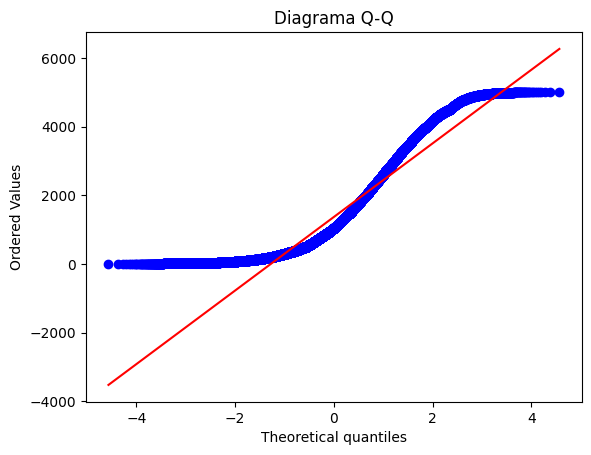

In [1066]:
import scipy.stats as stats
stats.probplot(df_Retail_verificar_TotalAmount['Total_Amount'], dist="norm", plot=plt)
plt.title('Diagrama Q-Q')
plt.show()

Como se puede apreciar, los puntos se desvían significativamente de la línea roja, especialmente en los extremos, lo que sugiere que los datos de 'Total_Amount' no siguen una distribución normal.

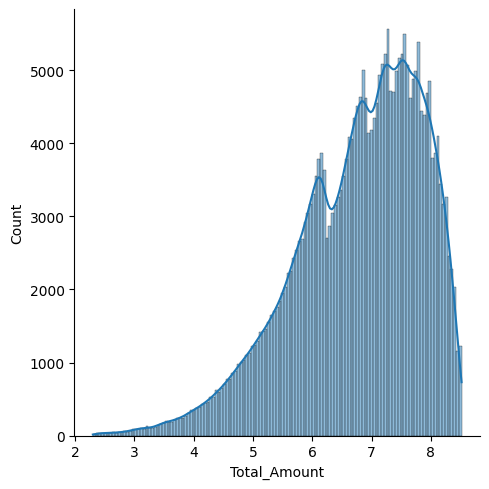

In [1067]:
sns.displot(np.log(df_Retail_verificar_TotalAmount['Total_Amount']), kde = True)

In [1105]:
df_Retail_copy_unique['Total_Amount_log'] = np.log(df_Retail_copy_unique['Total_Amount'])
df_Retail_norm = df_Retail_copy_unique.drop(columns=['Total_Amount'])

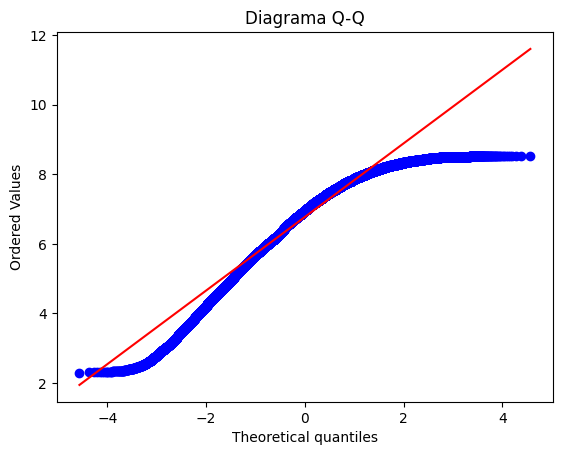

In [1106]:
stats.probplot(df_Retail_copy_unique['Total_Amount_log'], dist="norm", plot=plt)
plt.title('Diagrama Q-Q')
plt.show()

Verificando la variable luego de la normalizacion, se observa que el problema persiste. Esto puede deberse a la presencia de valores atipicos. A continuacion se estudian estos.

Outliers

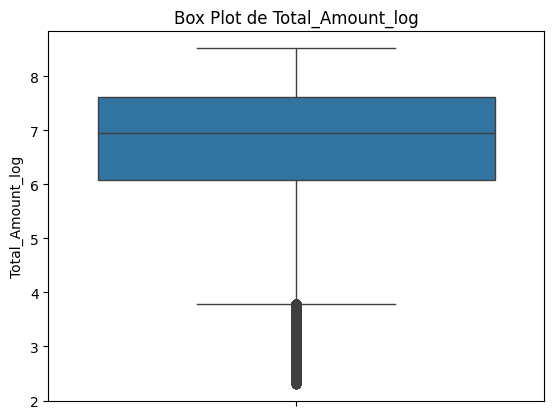

In [1107]:
sns.boxplot(y=df_Retail_norm['Total_Amount_log'])
plt.title('Box Plot de Total_Amount_log')
plt.ylabel('Total_Amount_log')
plt.show()

Como se puede ver en el grafico, hay evidencia de valores atipicos. Sin embargo, es posible que estos tengan sentido para el analisis, por lo que optare por dejarlos y estudiar (en el EDA) en mayor profundidad si es conveniente sacarlos o dejarlos.

Product_Category -->  Category of the purchased product.

In [1071]:
df_Retail_verificar_ProductCategory=df_Retail_norm.copy()

In [1072]:
df_Retail_verificar_ProductCategory['Product_Category'].unique()

['Electronics', 'Books', 'Home Decor', 'Grocery', 'Clothing']
Categories (5, object): ['Books', 'Clothing', 'Electronics', 'Grocery', 'Home Decor']

Se observan 5 tipo de categorias

Product_Brand --> Brand of the purchased product.

In [1073]:
df_Retail_verificar_ProductBrand=df_Retail_norm.copy()

In [1074]:
unique_ProductBrand = df_Retail_verificar_ProductBrand['Product_Brand'].cat.categories
print(unique_ProductBrand)

Index(['Adidas', 'Apple', 'Bed Bath & Beyond', 'BlueStar', 'Coca-Cola',
       'HarperCollins', 'Home Depot', 'IKEA', 'Mitsubhisi', 'Nestle', 'Nike',
       'Penguin Books', 'Pepsi', 'Random House', 'Samsung', 'Sony',
       'Whirepool', 'Zara'],
      dtype='object')


Se observan 18 marcas

Product_Type --> Type of the purchased product.

In [1075]:
df_Retail_verificar_ProductType=df_Retail_norm.copy()

In [1076]:
unique_ProductType = df_Retail_verificar_ProductType['Product_Type'].cat.categories
print(unique_ProductType)

Index(['Bathroom', 'Bedding', 'BlueStar AC', 'Children's', 'Chocolate',
       'Coffee', 'Decorations', 'Dress', 'Fiction', 'Fridge', 'Furniture',
       'Headphones', 'Jacket', 'Jeans', 'Juice', 'Kitchen', 'Laptop',
       'Lighting', 'Literature', 'Mitsubishi 1.5 Ton 3 Star Split AC',
       'Non-Fiction', 'Shirt', 'Shoes', 'Shorts', 'Smartphone', 'Snacks',
       'Soft Drink', 'T-shirt', 'Tablet', 'Television', 'Thriller', 'Tools',
       'Water'],
      dtype='object')


Feedback --> Feedback provided by the customer on the purchase.

In [1077]:
df_Retail_verificar_Feedback=df_Retail_norm.copy()

In [1078]:
unique_Feedback = df_Retail_verificar_Feedback['Feedback'].cat.categories
print(unique_Feedback)

Index(['Average', 'Bad', 'Excellent', 'Good'], dtype='object')


Shipping_Method --> Method used for shipping the product.

In [1079]:
df_Retail_verificar_ShippingMethod=df_Retail_norm.copy()

In [1080]:
unique_Shipping_Method = df_Retail_verificar_ShippingMethod['Shipping_Method'].cat.categories
print(unique_Shipping_Method)

Index(['Express', 'Same-Day', 'Standard'], dtype='object')


Payment_Method--> Method used for payment.

In [1081]:
df_Retail_verificar_Payment_Method=df_Retail_norm.copy()

In [1082]:
unique_Payment_Method = df_Retail_verificar_Payment_Method['Payment_Method'].cat.categories
print(unique_Payment_Method)

Index(['Cash', 'Credit Card', 'Debit Card', 'PayPal'], dtype='object')


Order_Status --> Status of the order (e.g., Pending, Processing, Shipped, Delivered).

In [1083]:
df_Retail_verificar_Order_Status=df_Retail_norm.copy()

In [1084]:
unique_Order_Status = df_Retail_verificar_Order_Status['Order_Status'].cat.categories
print(unique_Order_Status)

Index(['Delivered', 'Pending', 'Processing', 'Shipped'], dtype='object')


Ratings --> ratings given by customers on different products.

In [1085]:
df_Retail_verificar_Ratings=df_Retail_norm.copy()

In [1086]:
df_Retail_verificar_Ratings['Ratings'].unique()

array([4., 2., 1., 3., 5.])

In [1087]:
df_Retail_norm['Ratings'] = df_Retail_norm['Ratings'].astype(int)
df_Retail_norm['Transaction_ID'] = df_Retail_norm['Transaction_ID'].astype('category')
df_Retail_norm['Customer_ID'] = df_Retail_norm['Customer_ID'].astype('category')
df_Retail_norm['Zipcode'] = df_Retail_norm['Zipcode'].astype('category')



In [1088]:
df_Retail_norm['Ratings'].unique()

array([4, 2, 1, 3, 5])

Products

In [1089]:
df_Retail_verificar_products=df_Retail_norm.copy()

In [1090]:
unique_Payment_Products = df_Retail_verificar_products['products'].cat.categories
print(unique_Payment_Products)

Index(['4K TV', 'A-line dress', 'Acer Iconia Tab', 'Acer Swift', 'Action',
       'Adventure', 'Affogato', 'Air conditioner', 'Alkaline water',
       'Amazon Fire Tablet',
       ...
       'White chocolate', 'Wide-leg jeans', 'Windbreaker', 'Window AC',
       'Wireless headphones', 'Wrap dress', 'Wrench', 'Xiaomi Mi', 'iPad',
       'iPhone'],
      dtype='object', length=318)


##EDA

In [1091]:
df_Retail_norm.head(3)

,Transaction_ID,Customer_ID,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Month,Time,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Total_Amount_log
1,2174773.0,69749.0,82072 Dawn Centers,Nottingham,England,99071.0,United Kingdom,19,Female,Low,Premium,12/31/2023,December,8:42:04,2.0,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab,6.692964
2,6679610.0,30192.0,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48,Male,Low,Regular,4/26/2023,April,4:06:29,3.0,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment,6.969255
3,7232460.0,62101.0,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56,Male,High,Premium,5/8/2023,May,14:55:17,7.0,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife,7.810697


In [1092]:
transacciones = df_Retail_norm.groupby('Transaction_ID').size().reset_index(name='cantidad_productos_transaction') #DISTINTOS. PORQUE LA CANTIDAD DE PRODUCTOS COMPRADOS ES Total_Purchases
df_Retail_norm = df_Retail_norm.merge(transacciones, on='Transaction_ID', how='left')

df_Retail_norm.head(3)

C:\Users\mariana\AppData\Local\Temp\ipykernel_24208\731842923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transacciones = df_Retail_norm.groupby('Transaction_ID').size().reset_index(name='cantidad_productos_transaction')


,Transaction_ID,Customer_ID,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Month,Time,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Total_Amount_log,cantidad_productos_transaction
0,2174773.0,69749.0,82072 Dawn Centers,Nottingham,England,99071.0,United Kingdom,19,Female,Low,Premium,12/31/2023,December,8:42:04,2.0,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4,Lenovo Tab,6.692964,1
1,6679610.0,30192.0,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48,Male,Low,Regular,4/26/2023,April,4:06:29,3.0,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2,Sports equipment,6.969255,1
2,7232460.0,62101.0,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56,Male,High,Premium,5/8/2023,May,14:55:17,7.0,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4,Utility knife,7.810697,1


In [1093]:
df_Retail_norm_filtro=df_Retail_norm.copy()

In [1094]:
df_Retail_copy_unique_filtro2 = df_Retail_norm_filtro[df_Retail_norm_filtro['cantidad_productos_transaction'] > 2]
df_Retail_copy_unique_filtro2.head(3)

,Transaction_ID,Customer_ID,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Month,Time,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Total_Amount_log,cantidad_productos_transaction


In [1095]:
df_Retail_copy_unique_4676558 = df_Retail_norm_filtro[df_Retail_norm_filtro['Transaction_ID'] == 4676558.0]
df_Retail_copy_unique_4676558.head(3)

,Transaction_ID,Customer_ID,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Month,Time,Total_Purchases,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Total_Amount_log,cantidad_productos_transaction
169939,4676558.0,44964.0,96415 Kevin Dam,Canberra,New South Wales,21168.0,Australia,28,Female,Medium,New,2/20/2024,February,12:24:37,7.0,Home Decor,Bed Bath & Beyond,Kitchen,Average,Same-Day,Cash,Delivered,2,Food processor,8.105344,2
281142,4676558.0,44964.0,96415 Kevin Dam,Canberra,New South Wales,21168.0,Australia,28,Female,Medium,New,2/20/2024,February,12:24:37,7.0,Home Decor,Bed Bath & Beyond,Kitchen,Average,Same-Day,Cash,Delivered,2,Toaster,8.105344,2


Cuando se evalúa cuánto gastan los individuos por compra, se observa que no hay grandes fluctuaciones. El total varia entre 0 y 500, y la frecuencia es constante. Sin embargo, esto podria no ser muy indicativo de la realidad ya que no es lo mismo que se gaste lo 500 en una compra con un solo producto que en una con multiples productos. Para ello se estudia a continuacion el Amount promedio.

In [1096]:
df_Retail_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281164 entries, 0 to 281163
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Transaction_ID                  281164 non-null  category
 1   Customer_ID                     281164 non-null  category
 2   Address                         281164 non-null  category
 3   City                            281164 non-null  category
 4   State                           281164 non-null  category
 5   Zipcode                         281164 non-null  category
 6   Country                         281164 non-null  category
 7   Age                             281164 non-null  int64   
 8   Gender                          281164 non-null  category
 9   Income                          281164 non-null  category
 10  Customer_Segment                281164 non-null  category
 11  Date                            281164 non-null  category
 12  Mo

In [1100]:
df_Retail_norm.describe(percentiles=[.05,.5,.25,.75,.95,.99])


,Age,Total_Purchases,Ratings,Total_Amount_log,cantidad_productos_transaction
count,281164.000000,281164.000000,281164.000000,281164.000000,281164.000000
mean,35.404995,5.364076,3.165263,6.775598,1.000633
std,14.999750,2.868637,1.319448,1.082562,0.025153
min,18.000000,1.000000,1.000000,2.302585,1.000000
5%,19.000000,1.000000,1.000000,4.745801,1.000000
25%,22.000000,3.000000,2.000000,6.085501,1.000000
50%,32.000000,5.000000,3.000000,6.949171,1.000000
75%,46.000000,8.000000,4.000000,7.616495,1.000000
95%,65.000000,10.000000,5.000000,8.213167,1.000000
99%,69.000000,10.000000,5.000000,8.408715,1.000000


La edad promedio es de 35 años, siendo 18 la minima y 70 la maxima. el 50% de los clientes tienen menos de 32 años y se aprecia un salto a partir del cuartil 95; es decir, que los clientes son en su mayoria personas jovenes.
La cantidad de compras realizadas por los usuarios varia entre 1 y 10. Siendo 5.36 el promedio.
El total gastado por compra varia entre 10 y 500. Siendo 255,16 el promedio y 255,40 la mediana.

Como las personas se repiten, si quiero estudiar estadisticamente la edad de estas, tengo que hacer un drop de duplicados de Customer_ID. Commo todos los datos son en el mismo a;o, la edad de la persona va a ser la misma para todas sus compras, por lo que no me preocupa cual registro me quedo

In [2]:
from test_import import test


print(test.suma(5,1))
print(test.resta(1,8))




6
-7


In [2]:
from test_import import test2

print(test2.multi(6))


36


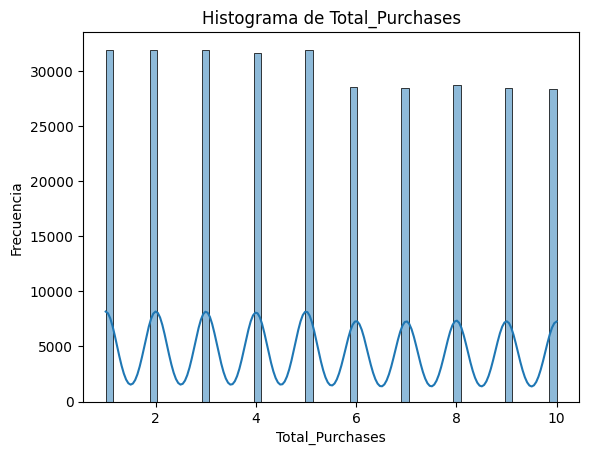

In [1]:
from test_import import plots

plots.grafico()